## Population by age each tiku, tiiki in Tsukuba City.

## 令和元年度行政区別年齢別人口
### Tsukuba City Open Data
- https://www.city.tsukuba.lg.jp/cgi-opd/opendata_detail.cgi?id=82d01d7d9a21a24aa2d707d2c0209b4c48fdfcd8
- 行政区別年齢別人口統計 （Excel 2.5MB) 'gyouseikubetunennreibetu011001.xlsx' 
- R01.10.01 現在 (2019/10/01)
- カテゴリ : 計画・行革・財政・統計
- ライセンス : CC BY（表示）リリース日2021年11月19日

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

## Reading one sheet data into Pandas and see

In [2]:
# Sheet1 : Yatabe_tiku 谷田部地区 表を確認
df_ya = pd.read_excel('data/gyouseikubetunennreibetu011001.xlsx', sheet_name='谷田部地区', 
                      skiprows=4, header=[0,1])
df_ya.fillna(0, inplace=True) 
df_ya

302  西平塚           *******  ｾﾀｲﾇｼ *******  *******  ﾇｼｲｶﾞｲ *******  \
       302  西平塚     ﾈﾝﾚｲ      ｵﾄｺ    ｵﾝﾅ     ｹ ｲ    ｵﾄｺ.1     ｵﾝﾅ   ｹ ｲ.1   
0      302  西平塚      ***       36      2      38       16      51      67   
1      302  西平塚        0        0      0       0        0       0       0   
2      302  西平塚        1        0      0       0        0       0       0   
3      302  西平塚        2        0      0       0        0       0       0   
4      302  西平塚        3        0      0       0        0       0       0   
...    ...  ...      ...      ...    ...     ...      ...     ...     ...   
17741  ALL    0    85-89      326    345     671       49     393     442   
17742  ALL    0    90-94      141    215     356       40     245     285   
17743  ALL    0    95-99       22     72      94        9      62      71   
17744  ALL    0  100-104        0      8       8        1       7       8   
17745  ALL    0  105-109        0      1       1        0       0       0   

       *******  ｺﾞｳｹｲ *******  *******  ﾆﾎﾝｼﾞﾝ *******  ******* ｶﾞｲｺｸｼﾞﾝ  \
         ｵﾄｺ.2    ｵﾝﾅ   ｹ ｲ.2    ｵﾄｺ.3     ｵﾝﾅ   ｹ ｲ.3    ｵﾄｺ.4      ｵﾝﾅ   
0           52     53     105       52      53     105        0        0   
1            0      0       0        0       0       0        0        0   
2            0      0       0        0       0       0        0        0   
3            0      0       0        0       0       0        0        0   
4            0      0       0        0       0       0        0        0   
...        ...    ...     ...      ...     ...     ...      ...      ...   
17741      375    738    1113      375     734    1109        0        4   
17742      181    460     641      181     458     639        0        2   
17743       31    134     165       31     134     165        0        0   
17744        1     15      16        1      15      16        0        0   
17745        0      1       1        0       1       1        0        0   

      *******  
        ｹ ｲ.4  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
17741       4  
17742       2  
17743       0  
17744       0  
17745       0  

[17746 rows x 18 columns]

## Reading data of 6 tikus
### Every tiku has one xlsx sheet
- 6tiku 6sheets : 谷田部、桜地、大穂、豊里、筑波、茎崎
- every tiku has tiikis

### columns of each sheet
- 世帯主、それ以外、合計、日本人、外国人　それぞれ男・女・合計の列がある。
- head of household, others, subtotal, japanese, foreigner, each has male, female, subtotal  

### index of each sheet
- 各sheet前半 :年齢階級1歳、後半:5歳刻み 
- sheet upper :by-age,   latter:by 5-year-old
- それぞれ地域ごとおよび地区合計の行がある。
- individual and all by tiiki in tiku


## Calculate statistical data of every tiiki 
- 各地区年齢階級1歳刻み合計人数の行だけ抜き出す。
- df_tiku['地域'].unique()で地域数と地域名を確認できる。
- 地域ごとの年齢別人口データから地域の平均値・標準偏差・最貧年齢を求める。

In [3]:
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']
for k in tikuname:
    df_tiku = pd.read_excel('data/gyouseikubetunennreibetu011001.xlsx', sheet_name= k +'地区', 
                            skiprows=5, usecols="A:C,J:L", 
                            names=['地域コード','地域','年齢','男','女','合計'])
    df_tiku.fillna(0, inplace=True)

    num_tiiki = len(df_tiku['地域'].unique()) - 1 #地区内のuniqueな地域数　数値0を含むので-1
    df_sum = df_tiku[0:num_tiiki*115:115].copy() # 115 = 111(0-109歳110rows + 合計1) + 4rows
    df_top = df_sum[df_sum['合計'] >= 1].copy() #１を他の値に変えれば、地域の人口で絞り込み可能
    tcode = [t for t in df_top['地域コード']]

# 地域ごとに平均値、標準偏差を計算して地区データとして保存する。
# calculate most common age, average age, and standard deviation of every tiiki.
    for t in tcode:
        ind = df_top[df_top['地域コード'] == t].index[0] # 各地域の最初の行：地域集計行
        df = df_tiku[ind:ind+111].copy() # 0-109歳110rows + 合計1 = 111rows
        df1 = df_tiku[ind+1:ind+111].copy()
        saih = df1[df1['合計'] == df1['合計'].max()]['年齢'].values[0] + 0.5 #
       
        df.loc[ind, '年齢'] = np.nan #ここには  ***　があり、集計できないのでnp.nanに変換しておく。
        df['agex'] = (df['年齢']+0.5)*df['合計']/df.loc[ind, '合計'] #階級値年齢+0.5 × 階級人数/合計人数
        aver = round(df['agex'].sum(), 4) # 平均値
        df['suj'] = (df['年齢']+0.5) - aver # 階級値は年齢+0.5
        df['su2'] = df['suj']*df['suj']* df['合計'] #平均値からのズレの2乗 × 階級人数
        sigm = df['su2'].sum()/df.loc[ind, '合計'] #分散
        stdd = np.sqrt(sigm) # 標準偏差
        #print(ind, aver, saih, stdd)
        df_top.loc[ind, '最頻年齢'] = saih
        df_top.loc[ind, '平均年齢'] = aver
        #df_top.loc[ind, 'sigm'] = sigm
        df_top.loc[ind, '標準偏差'] = stdd
        df_top.loc[ind, 'tiku'] = tikuname.index(k)  
    if k == '谷田部':
        df_s = df_top[['tiku', '地域コード', '地域', '男', '女', '合計','最頻年齢', '平均年齢', '標準偏差']].copy()
    else:
        df_s = pd.concat([df_s, df_top], join = 'inner')
        
# save to csv file
df_s.to_csv( 'data/つくば市R1_10.csv')
df_s

,tiku,地域コード,地域,男,女,合計,最頻年齢,平均年齢,標準偏差
0,0.0,302,西平塚,52,53,105,69.5,57.3476,22.510434
115,0.0,303,東平塚,235,235,470,25.5,42.9766,22.666464
230,0.0,304,下平塚,140,152,292,38.5,43.2123,23.629259
345,0.0,305,葛城根崎,23,26,49,38.5,42.7653,22.882821
460,0.0,306,苅間,620,595,1215,47.5,44.9634,23.660147
...,...,...,...,...,...,...,...,...,...
3795,5.0,936,明神,153,152,305,72.5,55.3230,23.625385
3910,5.0,937,稲荷原,109,126,235,69.5,54.8617,23.061274
4025,5.0,938,中山,179,199,378,44.5,44.0661,23.048651
4140,5.0,939,西大井,204,225,429,50.5,48.0152,22.543879


## Draw Bubble chart
- for annotation :standard deviation < 8 & total population > 50
- 標準偏差が8より小さい   &  合計人数が50人以上

In [4]:
# standard deviation < 8 & total population > 50
df_s[(df_s['標準偏差'] < 8) & (df_s['合計'] > 50)] 

,tiku,地域コード,地域,男,女,合計,最頻年齢,平均年齢,標準偏差
10465,0.0,400,茗渓学園寮,56,25,81,16.5,16.5864,4.369359
5865,1.0,556,筑波大学生宿舎,1054,1057,2111,19.5,24.3522,6.122076
5980,1.0,557,筑波大看護師宿舎,23,93,116,22.5,27.6121,5.883600


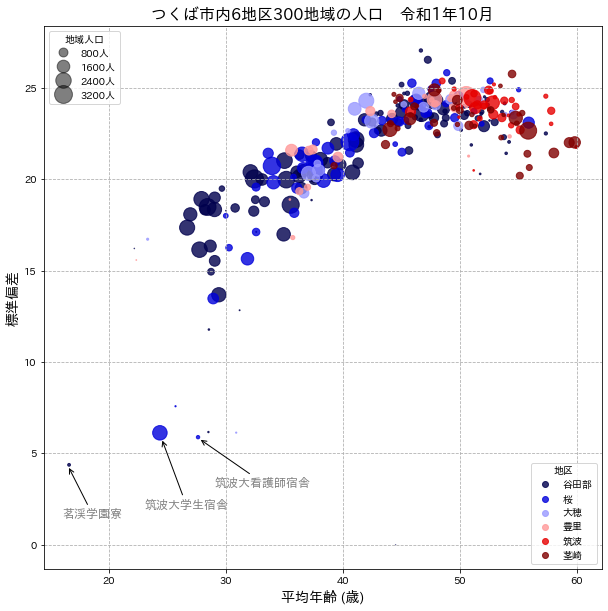

In [12]:
# Read data 
df = pd.read_csv('data/つくば市R1_10.csv')
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']
# different colors for each tiku
colormap = 'seismic'
cm = plt.cm.get_cmap(colormap)
fig, ax = plt.subplots(figsize=(10,10))

plt.xlabel('平均年齢 (歳)', fontsize=14)
plt.ylabel('標準偏差', fontsize=14)
plt.title('つくば市内6地区300地域の人口　令和1年10月', fontsize=16)
# bubble chart
scatter = ax.scatter(df['平均年齢'], df['標準偏差'], vmin=0, vmax=5, c=df['tiku'], cmap=cm, 
                     s=df['合計']/10, alpha=0.8)

legend1 = ax.legend(scatter.legend_elements()[0], ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎'],
                    loc="lower right", title="地区")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", num=5, fmt="{x:.0f}0人", alpha=0.5)
legend2 = ax.legend(handles, labels, loc="upper left", title="地域人口")
ax.grid(ls='--')
ax.annotate("筑波大学生宿舎", xy = (24.5, 5.8), size = 12, xytext = (23,2),
            color = "grey", arrowprops = dict(arrowstyle="->"))
ax.annotate("茗渓学園寮", xy = (16.5, 4.3), size = 12, xytext = (16,1.5),
            color = "grey", arrowprops = dict(arrowstyle="->"))
ax.annotate("筑波大看護師宿舎", xy = (27.7, 5.8), size = 12, xytext = (29,3.2),
            color = "grey", arrowprops = dict(arrowstyle="->"))

fig.savefig('chart/6地区300地域の人口201910'+ colormap + '.png')

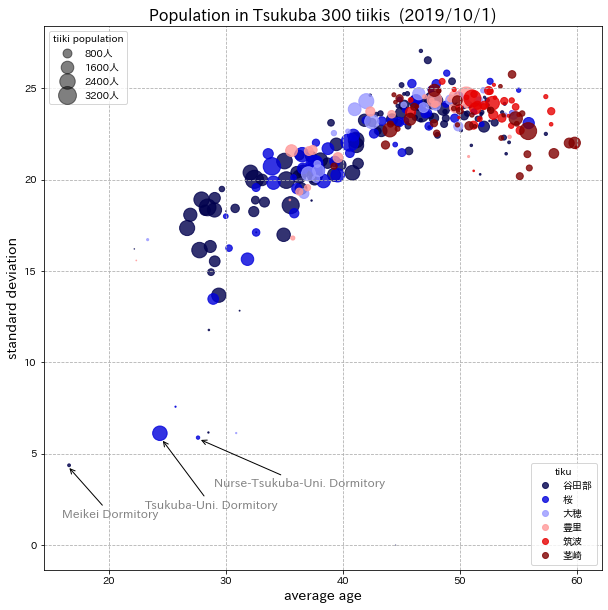

In [14]:
# Read data 
df = pd.read_csv('data/つくば市R1_10.csv')
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']
# different colors for each tiku
colormap = 'seismic'
cm = plt.cm.get_cmap(colormap)
fig, ax = plt.subplots(figsize=(10,10))

plt.xlabel('average age', fontsize=14)
plt.ylabel('standard deviation', fontsize=14)
plt.title('Population in Tsukuba 300 tiikis  (2019/10/1)', fontsize=16)
# bubble chart
scatter = ax.scatter(df['平均年齢'], df['標準偏差'], vmin=0, vmax=5, c=df['tiku'], cmap=cm,
                     s=df['合計']/10, alpha=0.8)

legend1 = ax.legend(scatter.legend_elements()[0], ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎'],
                    loc="lower right", title="tiku")
ax.add_artist(legend1)
handles, labels = scatter.legend_elements(prop="sizes", num=5, fmt="{x:.0f}0人", alpha=0.5)
legend2 = ax.legend(handles, labels, loc="upper left", title="tiiki population")
ax.grid(ls='--')
ax.annotate("Tsukuba-Uni. Dormitory", xy = (24.5, 5.8), size = 12, xytext = (23,2),
            color = "grey", arrowprops = dict(arrowstyle="->"))
ax.annotate("Meikei Dormitory", xy = (16.5, 4.3), size = 12, xytext = (16,1.5),
            color = "grey", arrowprops = dict(arrowstyle="->"))
ax.annotate("Nurse-Tsukuba-Uni. Dormitory", xy = (27.7, 5.8), size = 12, xytext = (29,3.2),
            color = "grey", arrowprops = dict(arrowstyle="->"))

fig.savefig('chart/stats6tiku300tiiki201910'+ colormap + '.png')

## Population of each tiku

In [7]:
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']
total = 0
for i in range(6):   
    df_i = df[df['tiku']==i].copy()
    tikujinko = df_i['合計'].sum()
    print(tikuname[i] + f' {tikujinko:,}人')
    total += tikujinko
print(f'total {total:,}人')

谷田部 105,659人
桜 53,978人
大穂 19,609人
豊里 16,276人
筑波 17,788人
茎崎 23,532人
total 236,842人


## tiiki numbers of each tiku

In [8]:
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']
tiiki_total = 0
for i in range(6):
    # row, col = i // 3, i % 3
    df_i = df[df['tiku']==i].copy()
    tiiki_num = len(df_i['地域'].unique())
    print(tikuname[i] + f' {tiiki_num:} tiikis')
    tiiki_total += tiiki_num
print(f'total {tiiki_total:} tiikis')

谷田部 124 tiikis
桜 57 tiikis
大穂 23 tiikis
豊里 24 tiikis
筑波 34 tiikis
茎崎 38 tiikis
total 300 tiikis


## Bubble chart for each tiku

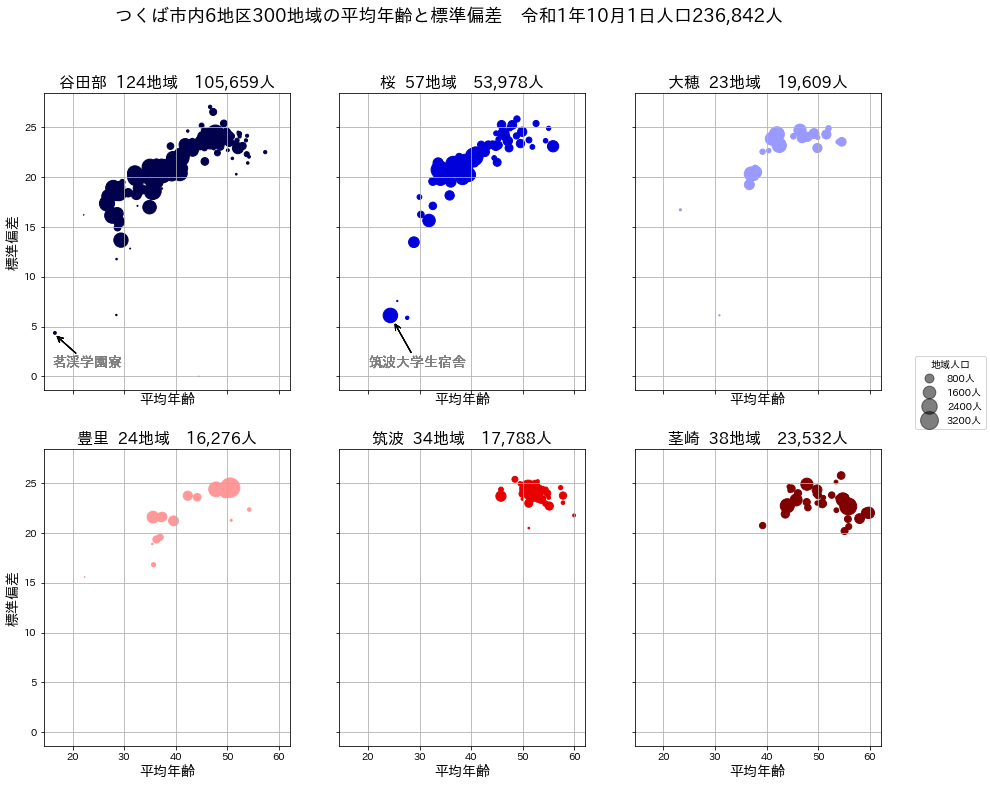

In [15]:
df = pd.read_csv('data/つくば市R1_10.csv')
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']

fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(15,12), sharex=True, sharey=True)
# different colors for each tiku
colormap = 'seismic'
cm = plt.cm.get_cmap(colormap)
total = 0
for i in range(6):
    row, col = i // 3, i % 3
    df_i = df[df['tiku']==i].copy()
    tikujinko = df_i['合計'].sum()
    total += tikujinko
    tiiki_num = len(df_i['地域'].unique())
    tiiki_total += tiiki_num

    axs[row, col].scatter(df_i['平均年齢'], df_i['標準偏差'], vmin=0, vmax=5,
                          c=df_i['tiku'], cmap=cm, s=df_i['合計']/10)
    axs[0, 1].annotate("筑波大学生宿舎", xy = (25, 5.5), size = 14, xytext = (20,1),
                        color = "grey", arrowprops = dict(arrowstyle="->"))
    axs[0, 0].annotate("茗渓学園寮", xy = (16.6, 4.2), size = 14, xytext = (16,1),
                        color = "grey", arrowprops = dict(arrowstyle="->"))

    axs[row, col].set_title(tikuname[i] + f'  {tiiki_num:}地域　{tikujinko:,}人' ,
                            fontsize=16)
    axs[row, col].grid(True)
    if col == 0:
        axs[row, col].set_ylabel('標準偏差', fontsize=14)
    axs[row, col].set_xlabel('平均年齢', fontsize=14)

#legend
handles, labels = scatter.legend_elements(prop="sizes", num=5, fmt="{x:.0f}0人", alpha=0.5)
legend2 = fig.legend(handles, labels, loc="center right", title="地域人口")
fig.suptitle('つくば市内6地区300地域の平均年齢と標準偏差　令和1年10月1日'+f'人口{total:,}人', fontsize=18)

fig.savefig('chart/6地区別300地域201910' + colormap + '.png')

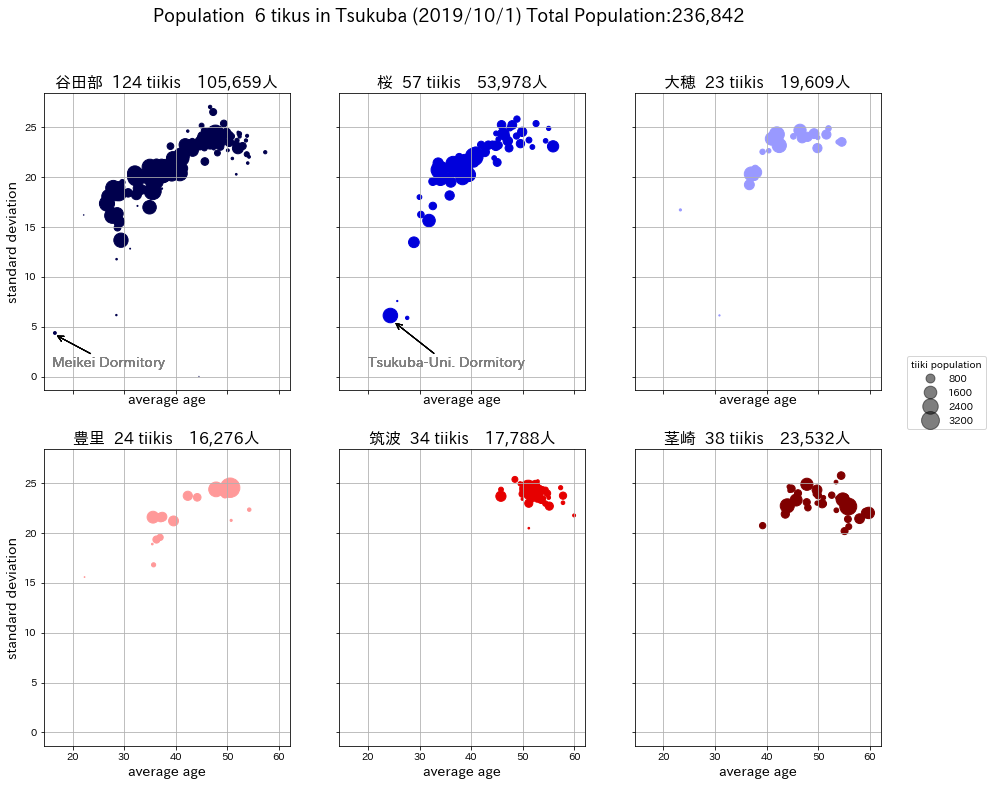

In [20]:
df = pd.read_csv('data/つくば市R1_10.csv')
tikuname = ['谷田部', '桜', '大穂', '豊里', '筑波', '茎崎']

fig, axs = plt.subplots(ncols=3,nrows=2,figsize=(15,12), sharex=True, sharey=True)
# different colors for each tiku
colormap = 'seismic'
cm = plt.cm.get_cmap(colormap)
total = 0
for i in range(6):
    row, col = i // 3, i % 3
    df_i = df[df['tiku']==i].copy()
    tikujinko = df_i['合計'].sum()
    total += tikujinko
    tiiki_num = len(df_i['地域'].unique())
    tiiki_total += tiiki_num

    axs[row, col].scatter(df_i['平均年齢'], df_i['標準偏差'], vmin=0, vmax=5,
                          c=df_i['tiku'], cmap=cm, s=df_i['合計']/10)
    axs[0, 1].annotate("Tsukuba-Uni. Dormitory", xy = (25, 5.5), size = 14, xytext = (20,1),
                        color = "grey", arrowprops = dict(arrowstyle="->"))
    axs[0, 0].annotate("Meikei Dormitory", xy = (16.6, 4.2), size = 14, xytext = (16,1),
                        color = "grey", arrowprops = dict(arrowstyle="->"))

    axs[row, col].set_title(tikuname[i] + f'  {tiiki_num:} tiikis　{tikujinko:,}人' ,fontsize=16)
    axs[row, col].grid(True)
    if col == 0:
        axs[row, col].set_ylabel('standard deviation', fontsize=14)
    axs[row, col].set_xlabel('average age', fontsize=14)

#legend 
handles, labels = scatter.legend_elements(prop="sizes", num=5, fmt="{x:.0f}0", alpha=0.5)
legend2 = fig.legend(handles, labels, loc="center right", title="tiiki population")
fig.suptitle('Population  6 tikus in Tsukuba (2019/10/1) '+f'Total Population:{total:,}', fontsize=18)

fig.savefig('chart/6tiku300tiiki201910' + colormap + '.png')